In [69]:
# Load the .py file
%run data_explore.py

Loading BokehJS ...

In [30]:
# set up a client 
client = bigquery.Client()

In [34]:
sql = """with tmp_tb as (
        SELECT
        unique_key, 
        taxi_id, 
        DATETIME(trip_start_timestamp, 'America/Chicago') trip_start_timestamp, 
        DATETIME(trip_end_timestamp, 'America/Chicago') trip_end_timestamp, 
        trip_miles, 
        pickup_census_tract, 
        dropoff_census_tract, 
        pickup_community_area, 
        dropoff_community_area, 
        payment_type, 
        company, 
        pickup_latitude, 
        pickup_longitude, 
        dropoff_latitude, 
        dropoff_longitude,
        fare,
        fare/100 fare_dollars
        FROM
        `bigquery-public-data.chicago_taxi_trips.taxi_trips` 
        WHERE 
        fare > 0 and fare is not null and trip_miles > 0 and trip_miles is not null
        ORDER BY 
        RAND()
        LIMIT 100000)
        SELECT *, 
        CAST(trip_start_timestamp AS DATE) trip_start_dt,
        CAST(trip_end_timestamp AS DATE) trip_end_dt,
        DATETIME_DIFF(trip_end_timestamp, trip_start_timestamp, MINUTE) trip_minutes,
        EXTRACT(YEAR FROM trip_start_timestamp) year,
        EXTRACT(MONTH FROM trip_start_timestamp) month,
        EXTRACT(DAY FROM trip_start_timestamp) day,
        EXTRACT(HOUR FROM trip_start_timestamp) hour,
        FORMAT_DATE('%a', DATE(trip_start_timestamp)) weekday,
        CASE WHEN (pickup_community_area IN (56, 64, 76)) OR (dropoff_community_area IN (56, 64, 76)) THEN 1 else 0 END is_airport
        FROM tmp_tb
        """

In [36]:
# get data from Big Query
df = get_raw(client, sql)
df.head()

,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,payment_type,...,fare_dollars,trip_start_dt,trip_end_dt,trip_minutes,year,month,day,hour,weekday,is_airport
0,1481a608294f7751c11f04c6e3573cbe2e123b56,9ca5e27a841f582db9e8fe5f8207b77bf701ac29482881...,2013-10-06 07:30:00,2013-10-06 07:45:00,2.2,NaN,NaN,24.0,8.0,Credit Card,...,0.0845,2013-10-06,2013-10-06,15,2013,10,6,7,Sun,0
1,826ceaaa5e3424c97b7bd4e9c6b98b244d8c4b15,ba7644ef7e3d92769dc2425a5fda5fe4527f9f08326daa...,2016-11-23 11:00:00,2016-11-23 11:45:00,8.3,NaN,NaN,6.0,6.0,Cash,...,0.2775,2016-11-23,2016-11-23,45,2016,11,23,11,Wed,0
2,3fd29a8b35d7e46a156e5441987b2cf91f2915cf,27ac571a7da50a8a926db5a27583ef282a290e500ad21c...,2015-05-28 12:45:00,2015-05-28 13:15:00,2.7,1.703128e+10,1.703184e+10,28.0,24.0,Cash,...,0.1205,2015-05-28,2015-05-28,30,2015,5,28,12,Thu,0
3,286245b3302ae3382b87fe5411293c34c7523388,90a7cf3946c408e70e8d64b08f2bc6819ae5de6159ecef...,2018-05-14 07:45:00,2018-05-14 07:45:00,0.5,1.703184e+10,1.703108e+10,32.0,8.0,Cash,...,0.0475,2018-05-14,2018-05-14,0,2018,5,14,7,Mon,0
4,c1a2d978d9169cbf331d7b5080248b0957bfb301,d7f7e8e4b06fea15a11863397d5df6352cc6e786f53540...,2016-02-05 15:00:00,2016-02-05 15:00:00,0.3,1.703108e+10,1.703108e+10,8.0,8.0,Cash,...,0.0400,2016-02-05,2016-02-05,0,2016,2,5,15,Fri,0


In [37]:
# Check data types
data_types(df)

unique_key                        object
taxi_id                           object
trip_start_timestamp      datetime64[ns]
trip_end_timestamp        datetime64[ns]
trip_miles                       float64
pickup_census_tract              float64
dropoff_census_tract             float64
pickup_community_area            float64
dropoff_community_area           float64
payment_type                      object
company                           object
pickup_latitude                  float64
pickup_longitude                 float64
dropoff_latitude                 float64
dropoff_longitude                float64
fare                             float64
fare_dollars                     float64
trip_start_dt                     object
trip_end_dt                       object
trip_minutes                       int64
year                               int64
month                              int64
day                                int64
hour                               int64
weekday         

In [38]:
data_describe(df)

          trip_miles  pickup_census_tract  dropoff_census_tract  \
count  100000.000000         6.815300e+04          6.775400e+04   
mean        4.116163         1.703137e+10          1.703136e+10   
std        13.335708         3.442407e+05          3.333793e+05   
min         0.010000         1.703101e+10          1.703101e+10   
25%         0.900000         1.703108e+10          1.703108e+10   
50%         1.600000         1.703128e+10          1.703128e+10   
75%         4.000000         1.703184e+10          1.703183e+10   
max      3040.000000         1.703198e+10          1.703198e+10   

       pickup_community_area  dropoff_community_area  pickup_latitude  \
count           91635.000000            89672.000000     91643.000000   
mean               23.589818               21.737120        41.901437   
std                19.968544               18.010913         0.038759   
min                 1.000000                1.000000        41.660136   
25%                 8.000000   

In [39]:
missing_values(df)

unique_key                    0
taxi_id                       0
trip_start_timestamp          0
trip_end_timestamp            0
trip_miles                    0
pickup_census_tract       31847
dropoff_census_tract      32246
pickup_community_area      8365
dropoff_community_area    10328
payment_type                  0
company                   22466
pickup_latitude            8357
pickup_longitude           8357
dropoff_latitude          10063
dropoff_longitude         10063
fare                          0
fare_dollars                  0
trip_start_dt                 0
trip_end_dt                   0
trip_minutes                  0
year                          0
month                         0
day                           0
hour                          0
weekday                       0
is_airport                    0
dtype: int64


In [40]:
share_rides(df)

,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,payment_type,...,trip_minutes,year,month,day,hour,weekday,is_airport,max_fare,min_fare,passengers
3173,d11433b85d8804f4e6957481455d84fae63d98b0,d4d701a426d6a0d4029cbdd7087ed1642a2c491e002aaf...,2013-12-13 05:45:00,2013-12-13 05:45:00,0.85,1.703108e+10,1.703108e+10,8.0,8.0,Credit Card,...,0,2013,12,13,5,Fri,0,21.25,7.05,2
3254,5162794b46785ab4b4eeb4fdcbdb0ea6a4ac071f,c6ffdc0251589be23a278276a859f640c823bbc9f21e4d...,2013-11-27 02:45:00,2013-11-27 02:45:00,0.30,1.703184e+10,1.703184e+10,28.0,32.0,Cash,...,0,2013,11,27,2,Wed,0,9.25,9.05,2
8627,d765f8fff8f2a74653cea1ce576ee7f39c4b400a,65c253eb76991d16eb75df5452fd9ee36925972c14b615...,2015-07-17 10:30:00,2015-07-17 10:45:00,3.20,NaN,NaN,32.0,35.0,Cash,...,15,2015,7,17,10,Fri,0,10.85,4.85,2
12628,bee93f1b018c5eb0140222fcfe014cac8f6b49d1,65c253eb76991d16eb75df5452fd9ee36925972c14b615...,2015-07-17 10:30:00,2015-07-17 10:30:00,0.60,1.703184e+10,1.703184e+10,32.0,32.0,Cash,...,0,2015,7,17,10,Fri,0,10.85,4.85,2
16350,46c3d56c8181d1c7068423b7cb47221b42e46ec9,d4d701a426d6a0d4029cbdd7087ed1642a2c491e002aaf...,2013-10-25 08:30:00,2013-10-25 08:30:00,0.23,1.703184e+10,1.703184e+10,32.0,32.0,Cash,...,0,2013,10,25,8,Fri,0,12.05,10.05,2
22416,72097b5154b3e6556d9e3a21d14d04096e9d9a7c,9472ac2ed88284fd6d87425e35fbc13bd462a38f594b1b...,2015-06-19 21:45:00,2015-06-19 21:45:00,1.80,NaN,NaN,1.0,3.0,Cash,...,0,2015,6,19,21,Fri,0,14.25,6.65,2
24181,98930e9774e2e3db959cfe341f6a5f4ebf4fcbb7,d4d701a426d6a0d4029cbdd7087ed1642a2c491e002aaf...,2013-10-25 08:30:00,2013-10-25 08:30:00,0.34,1.703108e+10,1.703184e+10,8.0,34.0,Credit Card,...,0,2013,10,25,8,Fri,0,12.05,10.05,2
36782,b0771095b4a69123f64097bf408708040455abdb,a325b14b280bbfdff06d740fb9ef083a12af4310f36402...,2015-10-30 20:00:00,2015-10-30 20:15:00,1.20,1.703132e+10,1.703108e+10,32.0,8.0,Credit Card,...,15,2015,10,30,20,Fri,0,5.85,5.25,2
43459,2229423b455de20f7ee8ce735c6eec48f4f67ef1,9472ac2ed88284fd6d87425e35fbc13bd462a38f594b1b...,2015-06-19 21:45:00,2015-06-19 22:00:00,5.10,NaN,NaN,3.0,2.0,Credit Card,...,15,2015,6,19,21,Fri,0,14.25,6.65,2
43663,048057dffd61627d5241da17a0447a5389362fa9,33164e16dd29b1c58cd15cce31df4bfcb75d9903cb66de...,2013-08-14 12:15:00,2013-08-14 12:15:00,0.16,NaN,NaN,2.0,2.0,Cash,...,0,2013,8,14,12,Wed,0,36.65,6.85,4


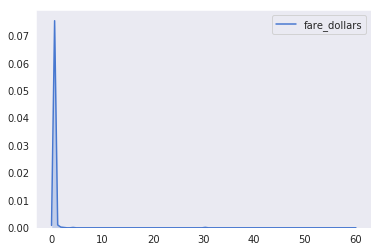

In [41]:
fare_distribution(df)

<Figure size 432x288 with 0 Axes>

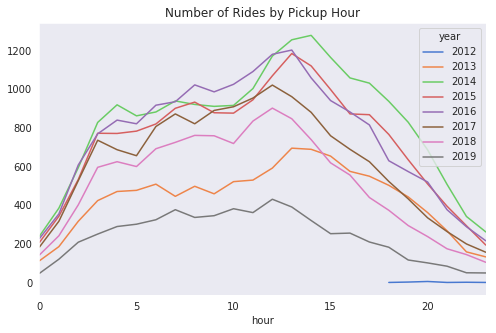

In [42]:
rides_by_hour_plot(df)

<Figure size 432x288 with 0 Axes>

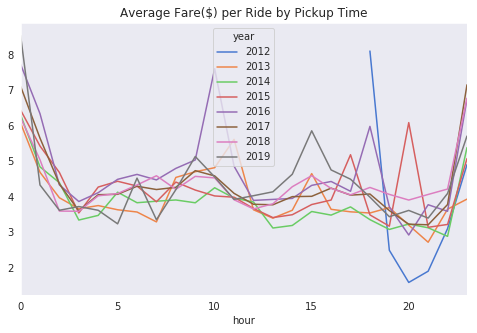

In [43]:
miles_by_hour_plot(df)

<Figure size 432x288 with 0 Axes>

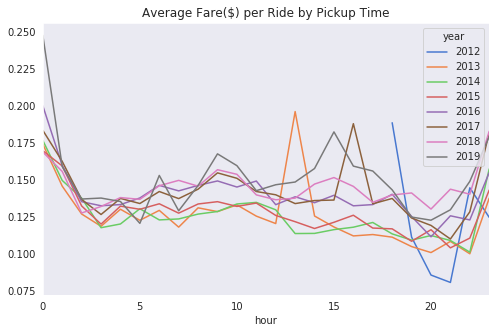

In [44]:
fare_by_hour_plot(df)

<Figure size 432x288 with 0 Axes>

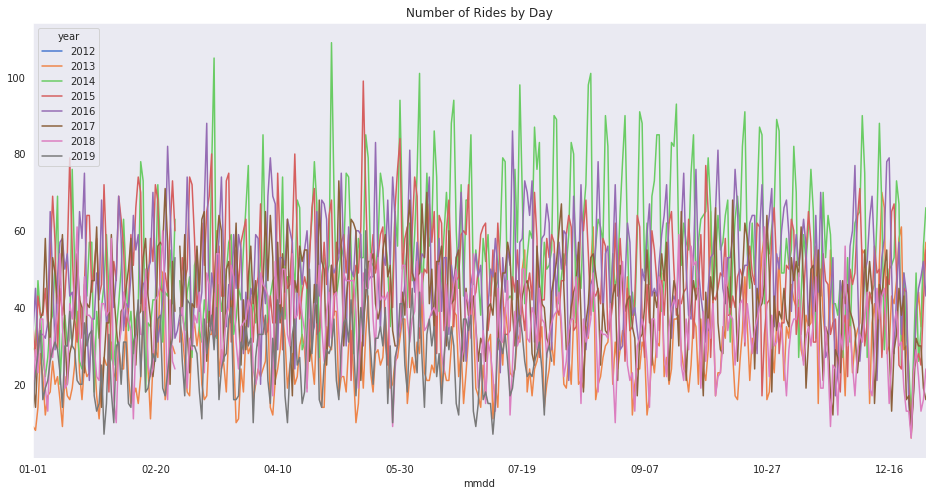

In [45]:
rides_by_date_plot(df)

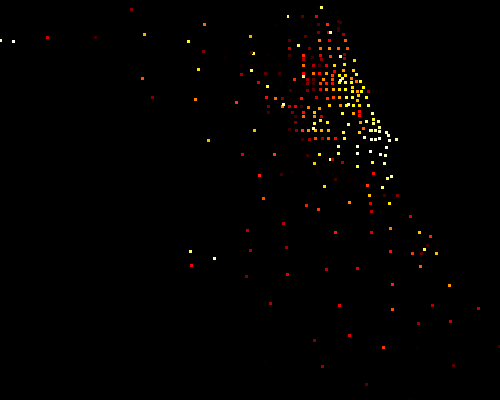

In [59]:
plot_pickup(df)

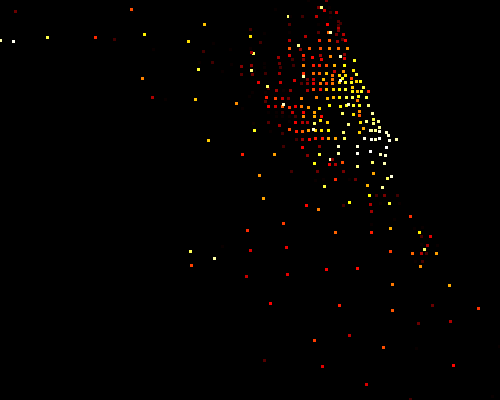

In [60]:
plot_dropoff(df)

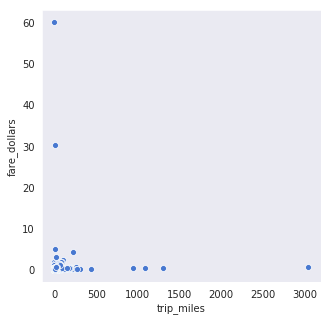

In [62]:
scatter_plot(df, 'trip_miles', 'fare_dollars')

In [63]:
rides_by_company(df)

,total_fare,rides,total_miles,miles_per_trip,dollars_per_mile
company,,,,,
0118 - 42111 Godfrey S.Awir,195.50,14,59.90,4.278571,3.263773
0118 - Godfrey S.Awir,12.30,2,2.00,1.000000,6.150000
0694 - 59280 Chinesco Trans Inc,93.10,6,33.30,5.550000,2.795796
0694 - Chinesco Trans Inc,14.70,2,3.50,1.750000,4.200000
1085 - 72312 N and W Cab Co,110.35,14,25.20,1.800000,4.378968
1085 - N and W Cab Co,44.60,4,15.00,3.750000,2.973333
1247 - 72807 Daniel Ayertey,115.25,8,41.90,5.237500,2.750597
1247 - Daniel Ayertey,10.65,1,3.00,3.000000,3.550000
1408 - 89599 Donald Barnes,32.85,1,15.40,15.400000,2.133117


In [64]:
rides_by_driver(df)

,total_fare,rides,total_miles,miles_per_trip,dollars_per_mile
taxi_id,,,,,
001330b81e23412049f9c3eff5b6e972a91afe59c9aa36ef29747881b4bf803adfd02b1a71cca5cb8c2214275330aa4520df34d7848100414acb4b4cad642e62,227.05,15,72.80,4.853333,3.118819
0013da5489fe976daf4f4a7d246073ecf2caed9b12b3be70eff37b63ef9ca4102c972145ddd8537811752d51b222b4618dfbae451b966d7a3ad9afa4ec878a6e,142.50,15,34.49,2.299333,4.131632
0041f8f0c91881c1e1913f2548522495fe3c4c719aa67fd2483ebbcc22e0aa1bfff2cddb32c35cde3ad9766b0e8d44c04ff5dfdcf1035462ba81a13e3ba6b8f9,175.60,14,42.60,3.042857,4.122066
0044e6c0d091476299b99345501f756b23632a96cbaf40e872fbf14f976410d3f938aacc643ed608b2aa42809222d4458e1aab5e0848e9b952f35616785c3a36,385.83,25,143.26,5.730400,2.693215
00752524a4118a162dce62ff49c0eb0f79530d9e0ecb5a9b0d23deae98ef2ab2bc84831d2191950da25620e550ad69840e1d02f69d49ab1d9b2b4387e31c2af1,188.00,6,69.80,11.633333,2.693410
0083fcde0fb490b4ec424c63d1d750378f6ad11154d1d4a1cd5388b0b7d16c72eacf606c4d90cbdee388d2a99f3ed24d126ee948ba7c37da0af1d254b8b069cf,291.85,15,34.30,2.286667,8.508746
008c43f04857eb09949b8ce05458d3fc8848dfd460d9253ede7b06398222b16321eeeb2749e116221296740b193ebc95e3d4cbd8cbf4dd31c8ab0318976dcbab,394.36,42,110.90,2.640476,3.555996
008ca9f6e7dff925f1a18284fb269fc3c781977db68d1580f0b02842003a66b390ad28ce875fd7fdcca3880c12bbeab9beb1404c32bd0ae39f5f8ae22d90dad2,405.10,37,123.10,3.327027,3.290820
008dda45db57cb6daa679a86ce8c8149ddc05446d545b19f3b6e201071e93b3a0d30a0a46204415c1d145a47e256bab70c8b0aebeb37ffefc985fdfc288d38d6,192.90,18,51.70,2.872222,3.731141


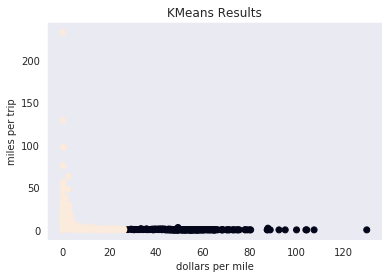

In [71]:
cluster_df = cluster_drivers(df, 2)
plot_cluster_results(cluster_df)

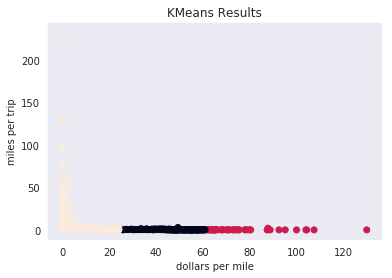

In [72]:
cluster_df = cluster_drivers(df, 3)
plot_cluster_results(cluster_df)

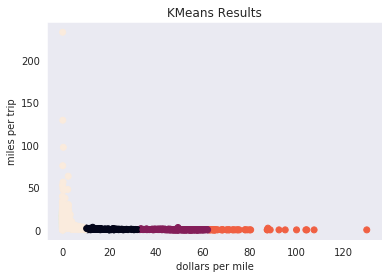

In [73]:
cluster_df = cluster_drivers(df, 4)
plot_cluster_results(cluster_df)

In [75]:
a = df.head()
a.to_csv('text.csv', index = False)
!gsutil cp 'text.csv' 'gs://taxi_fare_3/data/csv/a.csv'

Copying file://text.csv [Content-Type=text/csv]...
/ [1 files][  2.2 KiB/  2.2 KiB]                                                
Operation completed over 1 objects/2.2 KiB.                                      


In [84]:
b = pd.read_csv('gs://taxi_fare_3/data/csv/test.csv', header=None)

In [86]:
df4 = filter_data(df3, parameters.distance_upper_limit, parameters.mph_upper_limit)
    df5 = df4[['hour','weekday','pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude', 'k2','is_luxury','fare_dollars']]
    
    save_gcs(df5.decode('utf-8'), parameters.training_path)

,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,payment_type,...,trip_start_dt,trip_end_dt,trip_minutes,year,month,day,hour,weekday,is_airport,mmdd
0,1481a608294f7751c11f04c6e3573cbe2e123b56,9ca5e27a841f582db9e8fe5f8207b77bf701ac29482881...,2013-10-06 07:30:00,2013-10-06 07:45:00,2.2,NaN,NaN,24.0,8.0,Credit Card,...,2013-10-06,2013-10-06,15,2013,10,6,7,Sun,0,10-06
1,826ceaaa5e3424c97b7bd4e9c6b98b244d8c4b15,ba7644ef7e3d92769dc2425a5fda5fe4527f9f08326daa...,2016-11-23 11:00:00,2016-11-23 11:45:00,8.3,NaN,NaN,6.0,6.0,Cash,...,2016-11-23,2016-11-23,45,2016,11,23,11,Wed,0,11-23
2,3fd29a8b35d7e46a156e5441987b2cf91f2915cf,27ac571a7da50a8a926db5a27583ef282a290e500ad21c...,2015-05-28 12:45:00,2015-05-28 13:15:00,2.7,1.703128e+10,1.703184e+10,28.0,24.0,Cash,...,2015-05-28,2015-05-28,30,2015,5,28,12,Thu,0,05-28
3,286245b3302ae3382b87fe5411293c34c7523388,90a7cf3946c408e70e8d64b08f2bc6819ae5de6159ecef...,2018-05-14 07:45:00,2018-05-14 07:45:00,0.5,1.703184e+10,1.703108e+10,32.0,8.0,Cash,...,2018-05-14,2018-05-14,0,2018,5,14,7,Mon,0,05-14
4,c1a2d978d9169cbf331d7b5080248b0957bfb301,d7f7e8e4b06fea15a11863397d5df6352cc6e786f53540...,2016-02-05 15:00:00,2016-02-05 15:00:00,0.3,1.703108e+10,1.703108e+10,8.0,8.0,Cash,...,2016-02-05,2016-02-05,0,2016,2,5,15,Fri,0,02-05
